In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

In [54]:
# set path
print(os.getcwd())
os.chdir(r"C:\\Users\\nafis\\Documents\\Naf's files\\Courses\\DataCamp\\datacamp 5 - skill track - Applied Finance in Python\\1 Introduction to Portfolio Risk Management in Python\\data")  # Provide the new path here

C:\Users\nafis\Documents\Naf's files\Courses\DataCamp\datacamp 5 - skill track - Applied Finance in Python\1 Introduction to Portfolio Risk Management in Python\data


In [86]:
# The file you're going to load include daily Open, High, Low, Close, Adjusted Close, and Volume data, 
# often referred to as OHLCV data.

# Read in the csv file and parse dates
StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print("first_five_rows:", StockPrices.head())


print(StockPrices.info())

first_five_rows:         Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4561 entries, 0 to 4560
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4561 non-null   datetime64[ns]
 1   Open      4561 non-null   float64       
 2   High      4561 non-null   float64       
 3   Low       4561 non-null   float64       
 4   Close     4561 non-null   float64       
 5   Volume    4561 non-null   int64         
 6   Adjusted  4561 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory 

first_five_rows:         Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


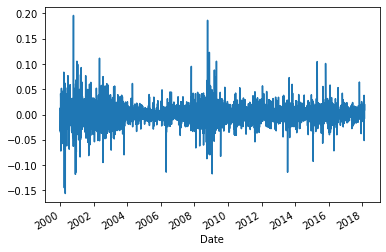

In [87]:
# Calculating financial returns:'Adjusted Close' column is normalized for stock splits, dividends, and other corporate actions, 
# and is a true reflection of the return of the stock over time. 

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print("first_five_rows:", StockPrices.head())

# Convert the 'Date' column to index, so that we get Date as x-axis when we plot 
StockPrices = StockPrices.set_index('Date')

# Plot the returns column over time
StockPrices['Returns'].plot() 
plt.show()

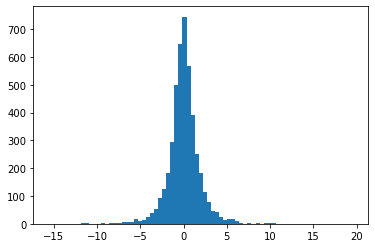

In [62]:
# Return distributions: to analyze the probability of outliers in returns, 
# it is helpful to visualize the historical returns of a stock using a histogram.

# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, 75)
plt.show()

In [64]:
# To estimate the average annual return of a stock given the average daily return 
# and the number of trading days in a year (roughly 252 trading days in a year):

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print("mean_return_daily:", mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1 + mean_return_daily)**252) - 1
print("mean_return_annualized:", mean_return_annualized)

mean_return_daily: 0.0003777754643575769
mean_return_annualized: 0.09985839482852632


In [66]:
# Calculate the standard deviation (Volatility/Vol) of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print("sigma_daily:", sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print("variance_daily:", variance_daily)

# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print("sigma_annualized:", sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print("variance_annualized:", variance_annualized)

sigma_daily: 0.019341100408708328
variance_daily: 0.0003740781650197374
sigma_annualized: 0.3070304505826317
variance_annualized: 0.09426769758497383


In [68]:
# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print("skewness:", returns_skewness)

# Calculate the 'excess' kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print("excess_kurtosis:", excess_kurtosis)

# Derive the true fourth moment (kurtosis) of the returns distribution
fourth_moment = excess_kurtosis + 3
print("fourth_moment/kurtosis:", fourth_moment)

skewness: 0.21935459193067805
excess_kurtosis: 10.314572618025519
fourth_moment/kurtosis: 13.314572618025519


In [69]:
# Statistical normality test (wether a distribition is normal)
# Test 1: Check third and fourth moments. If skewness away from zero & (excess) kurtosis greater than (0) 3, assume that the data are non-normally distributed.
# Test 2: Shapiro-Wilk test: this function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. 
# If the p-value is less than or equal to 0.05, reject the null hypothesis of normality and assume that the data are non-normally distributed.


# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0
